The dataset can be found at https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv
and the audio features are described here at https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spotify.plots import SpotifyPlots
from spotify.data_transformations import DataTransformations

In [2]:
df = pd.read_csv(
    "/home/sabyasachi/git/spotify_tracks/dataset/tracks.csv"
)  # Read dataframe

In [3]:
print(f"The shape of the dataframe is {df.shape}.")

The shape of the dataframe is (586672, 20).


In [4]:
df.info() # check datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
df.describe()  # In particular, we note that max of popularity is 100.0, min is 0.0.

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


<AxesSubplot: ylabel='Frequency'>

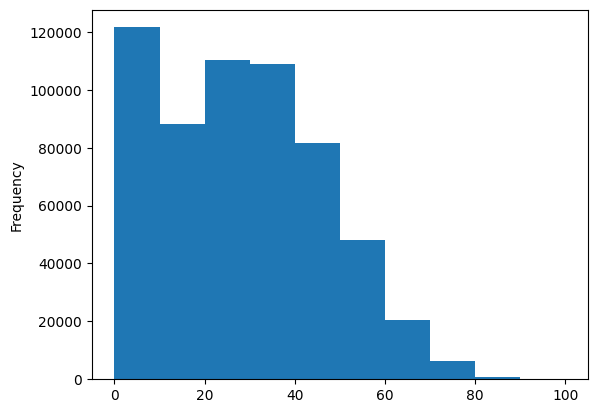

In [6]:
df.popularity.plot(kind="hist") # check the distribution of popularity

In [7]:
df["release_date"] = df["release_date"].astype("datetime64[ns]")
df.query("release_date>= 2012").popularity.quantile(0.9) # find the 90th percentile of popularity for tracks released in and after
# 2012

64.0

Based on the information about the audio features listed above, I transform the dataset.

In [8]:
DF = DataTransformations.preprocess(df)

In [9]:
DF.info() # check if the datatype transformation was successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106177 entries, 39511 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                106177 non-null  object        
 1   name              106177 non-null  object        
 2   popularity        106177 non-null  int64         
 3   duration_ms       106177 non-null  int64         
 4   explicit          106177 non-null  category      
 5   artists           106177 non-null  object        
 6   id_artists        106177 non-null  object        
 7   release_date      106177 non-null  datetime64[ns]
 8   danceability      106177 non-null  float64       
 9   energy            106177 non-null  float64       
 10  key               106177 non-null  category      
 11  loudness          106177 non-null  float64       
 12  mode              106177 non-null  category      
 13  speechiness       106177 non-null  float64       
 14  

In [19]:
len(DF.query("popularity == 1"))/len(DF) # Proportion of tracks which have a popularity of more than 64

0.1084321463217081

In [10]:
"""Change dtypes to make these columns amenable to histogram plots."""
DF_copy = DF.copy()
DF_copy["key"] = DF_copy["key"].astype("int8")
DF_copy["time_signature"] = DF_copy["time_signature"].astype("int8")
DF_copy["mode"] = DF_copy["mode"].astype("int8")
DF_copy["explicit"] = DF_copy["explicit"].astype("int8")

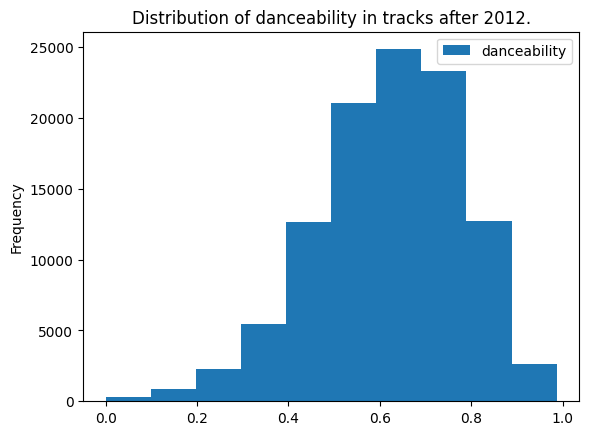

None


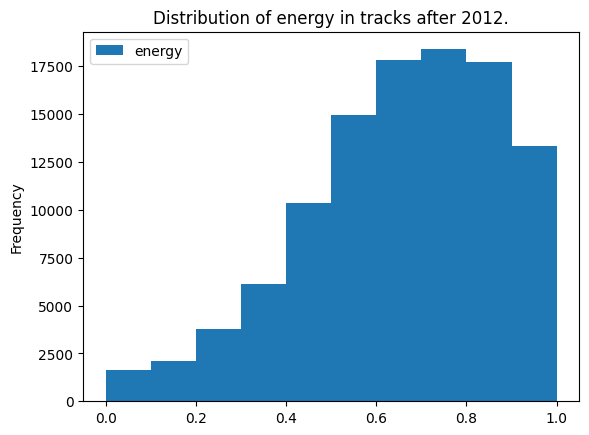

None


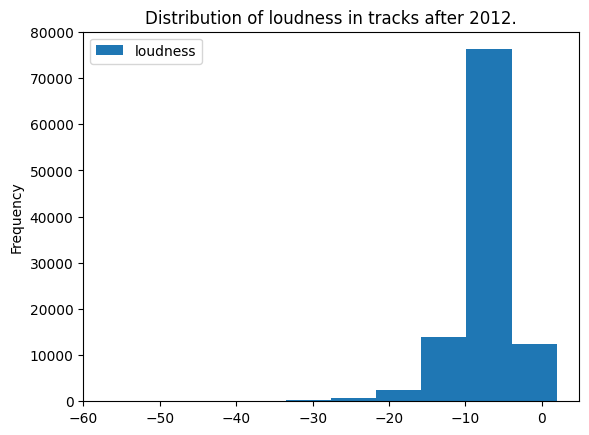

None


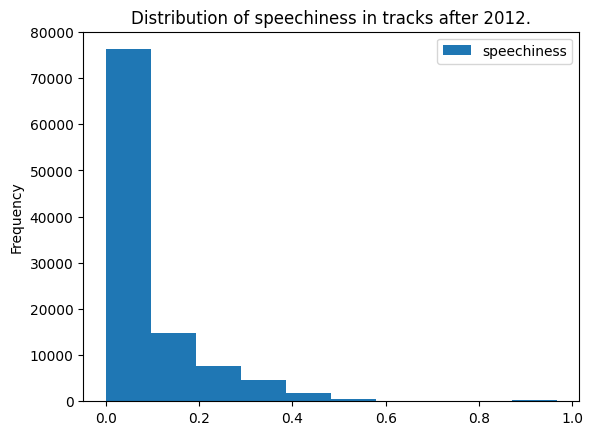

None


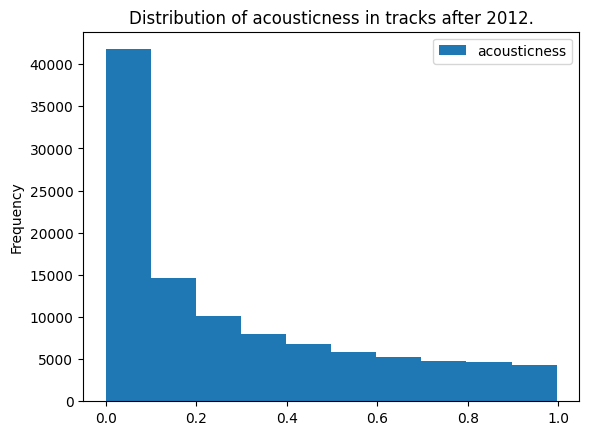

None


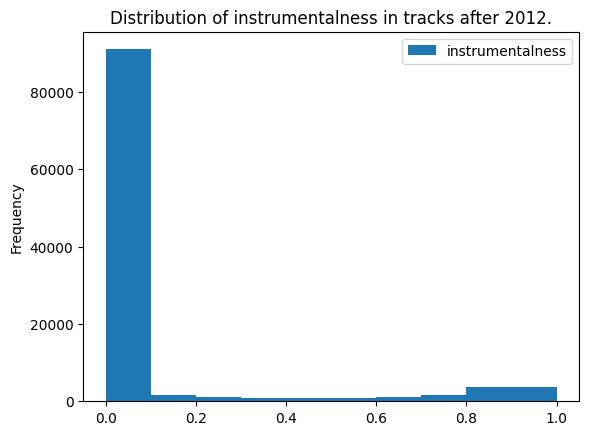

None


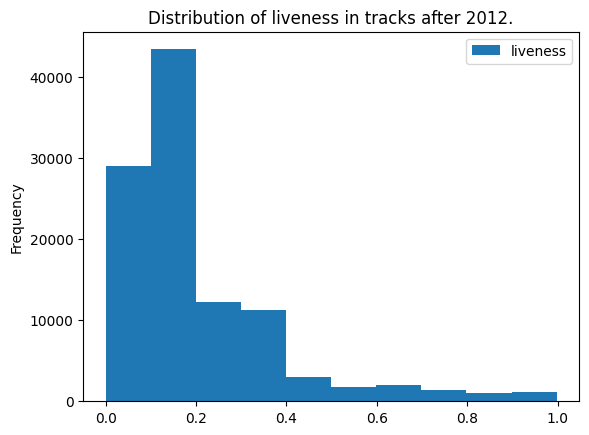

None


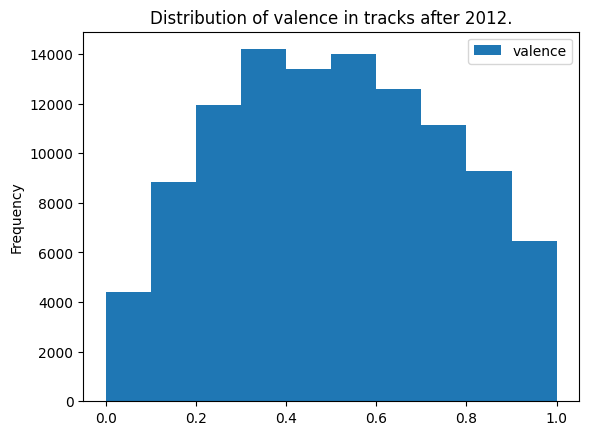

None


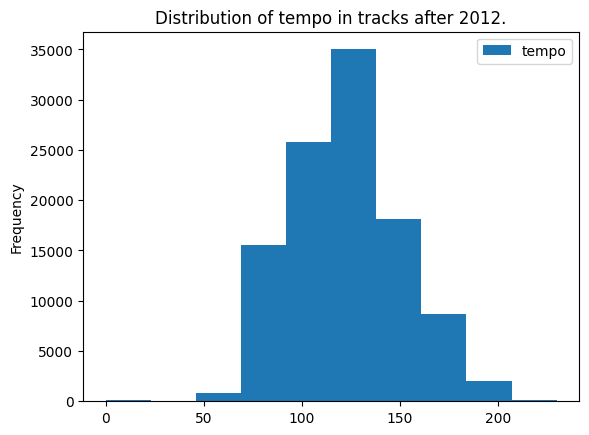

None


In [11]:
selected_columns = list(DF_copy.select_dtypes(include=['float64', 'category'])) # select columns that have dtype float64, category
#selected_columns = list(DF.select_dtypes(include=['float64']))
for column in selected_columns:
    print(SpotifyPlots.distribution_plot(DF_copy, column_name=column))


We now know the distribution of each of these attributes. We particularly note the heavily skewed distribution of
`acousticness`, `instrumentalness`, and `speechiness`.

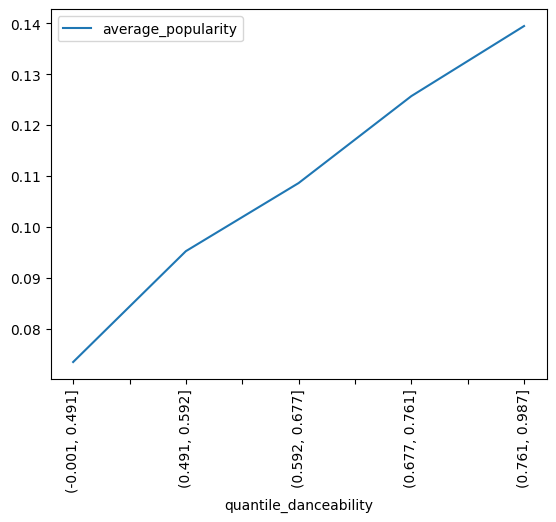

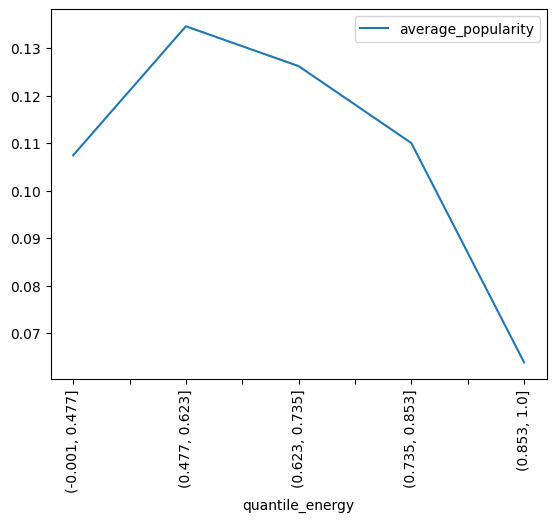

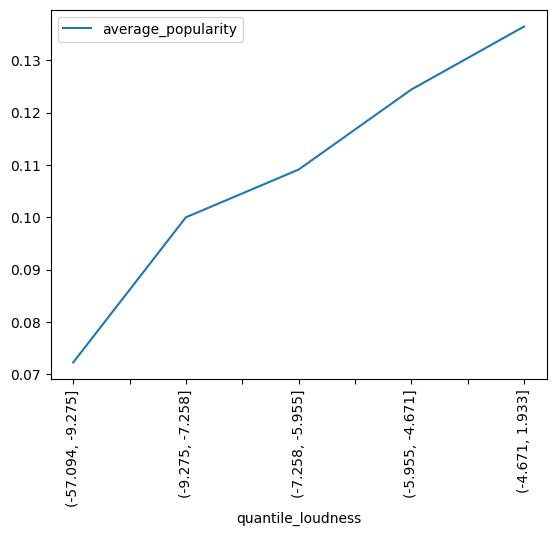

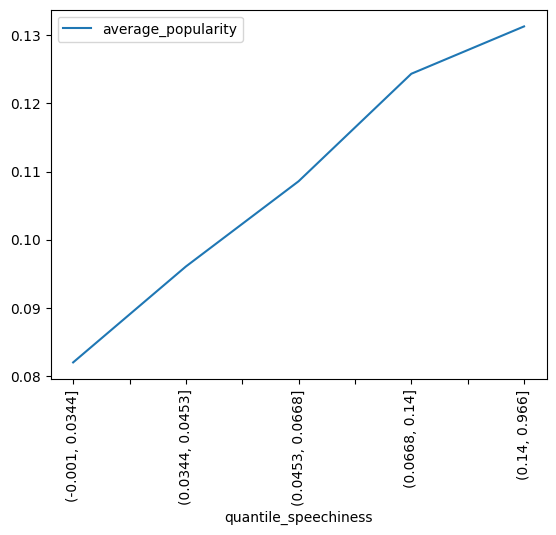

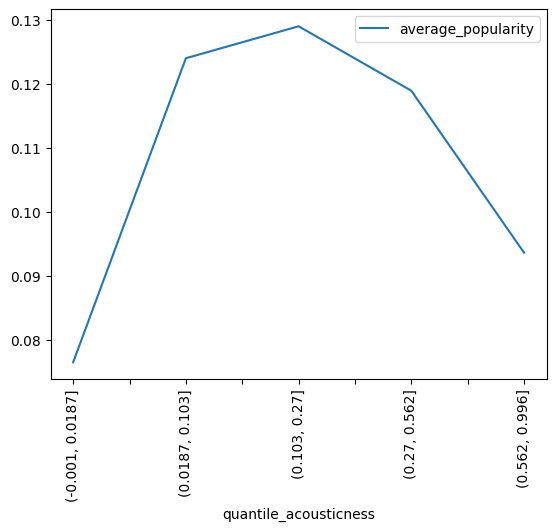

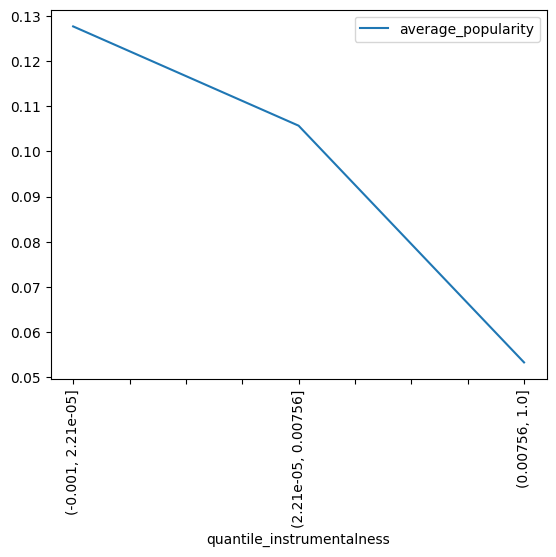

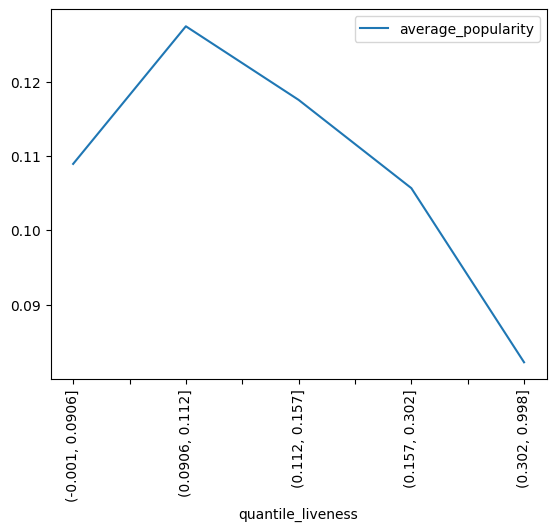

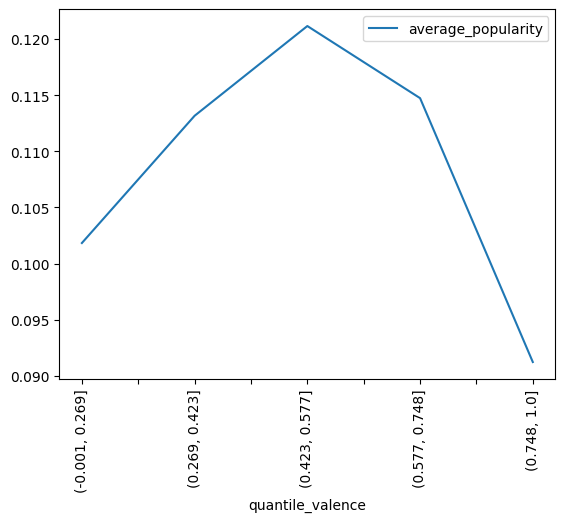

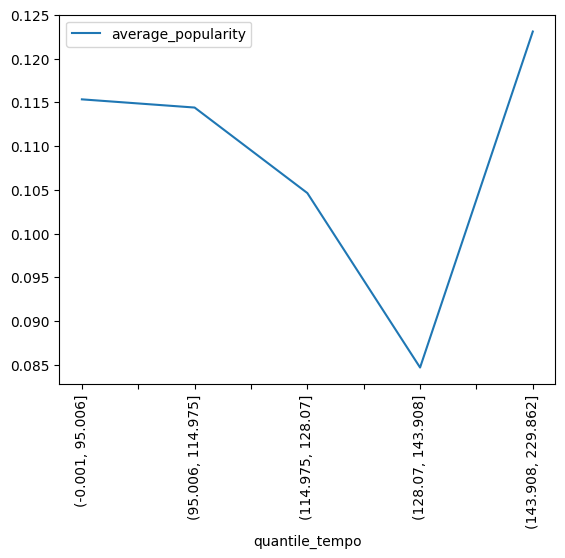

In [12]:
float_columns = list(DF.select_dtypes(include=['float64']))
for column in float_columns:
    SpotifyPlots.attribute_vs_popularity(DF, column_name=column)

These plots reveal that `popularity` rises sharply with increase in `danceability`, `speechiness` and `loudness`. It falls
with increase in `instrumentalness` and `liveness`. 

Because of the definition of qcut, we can confidently claim that each bin has about the same number of samples, and 
therefore contains sufficient number of samples.

Let us analyse those features with categorical data-type.

In [13]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106177 entries, 39511 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                106177 non-null  object        
 1   name              106177 non-null  object        
 2   popularity        106177 non-null  int64         
 3   duration_ms       106177 non-null  int64         
 4   explicit          106177 non-null  category      
 5   artists           106177 non-null  object        
 6   id_artists        106177 non-null  object        
 7   release_date      106177 non-null  datetime64[ns]
 8   danceability      106177 non-null  float64       
 9   energy            106177 non-null  float64       
 10  key               106177 non-null  category      
 11  loudness          106177 non-null  float64       
 12  mode              106177 non-null  category      
 13  speechiness       106177 non-null  float64       
 14  

In [14]:
DF.groupby('explicit').agg(avg = ('popularity', 'mean')) # Tracks with explicit lyrics tend to be more popular

,avg
explicit,
0,0.089304
1,0.217746


<AxesSubplot: xlabel='key'>

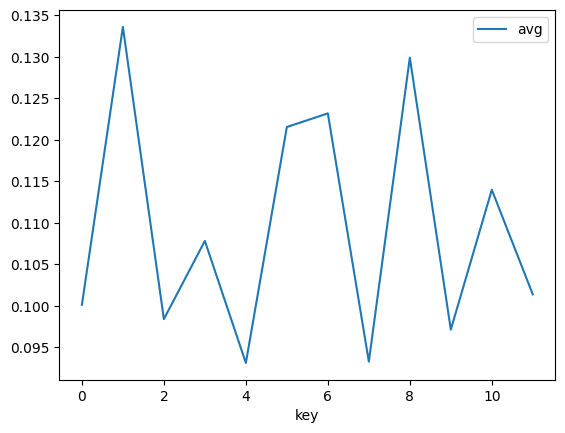

In [15]:
DF.groupby('key').agg(avg = ('popularity', 'mean')).plot() # keys 1 and 8 have highest popularity

In [16]:
DF.groupby('key').agg(avg = ('popularity', 'mean')) # print table to get precise numbers

,avg
key,
0,0.100132
1,0.133592
2,0.098410
3,0.107829
4,0.093134
5,0.121540
6,0.123181
7,0.093296
8,0.129894


In [17]:
DF.groupby('mode').agg(avg = ('popularity', 'mean')) # fairly close in magnitude

,avg
mode,
0,0.107903
1,0.108802


In [18]:
DF.groupby('time_signature').agg(avg = ('popularity', 'mean')) # those with time signature 0 tend to be the most popular

,avg
time_signature,
0,0.153846
1,0.102334
3,0.102109
4,0.108696
5,0.114071


We printed these numbers so that we can come up with some baseline models that classify tracks as popular or not popular.  

Correlation analysis.

In [25]:
DF.corr()

/tmp/ipykernel_6044/2191442155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF.corr()


,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.043251,0.076474,-0.036501,0.065690,0.035585,-0.009142,-0.093064,-0.046978,-0.010673,-0.002497
duration_ms,-0.043251,1.000000,-0.091767,-0.001151,-0.006530,-0.077395,-0.016623,0.052906,0.005712,-0.121743,0.006728
danceability,0.076474,-0.091767,1.000000,0.107631,0.222229,0.196007,-0.161689,-0.185091,-0.181479,0.429511,-0.079255
energy,-0.036501,-0.001151,0.107631,1.000000,0.696827,0.060687,-0.662922,-0.027120,0.177604,0.323917,0.182486
loudness,0.065690,-0.006530,0.222229,0.696827,1.000000,0.000678,-0.471109,-0.368974,0.033441,0.305095,0.152352
speechiness,0.035585,-0.077395,0.196007,0.060687,0.000678,1.000000,-0.038095,-0.099381,0.052923,0.070840,0.024946
acousticness,-0.009142,-0.016623,-0.161689,-0.662922,-0.471109,-0.038095,1.000000,-0.016038,-0.070326,-0.147631,-0.144870
instrumentalness,-0.093064,0.052906,-0.185091,-0.027120,-0.368974,-0.099381,-0.016038,1.000000,0.051935,-0.218013,0.000507
liveness,-0.046978,0.005712,-0.181479,0.177604,0.033441,0.052923,-0.070326,0.051935,1.000000,-0.012349,0.009313
valence,-0.010673,-0.121743,0.429511,0.323917,0.305095,0.070840,-0.147631,-0.218013,-0.012349,1.000000,0.061341


/tmp/ipykernel_6044/3616042087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = DF.corr()


<AxesSubplot: >

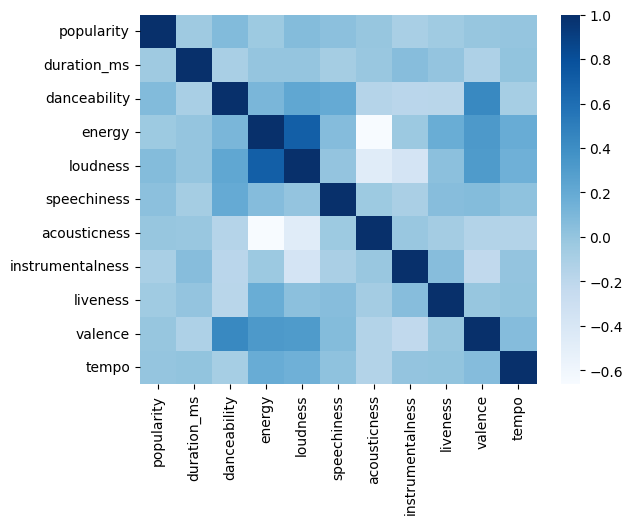

In [26]:
correlation_mat = DF.corr()
import seaborn as sns
sns.heatmap(correlation_mat, xticklabels=correlation_mat.columns, yticklabels=correlation_mat.columns, cmap = "Blues")

Reading off this heathmap, `loudness` and `energy` seem to have high correlation. 
Same with `danceability` and `valence`.

In [27]:
correlation_mat['danceability']

popularity          0.076474
duration_ms        -0.091767
danceability        1.000000
energy              0.107631
loudness            0.222229
speechiness         0.196007
acousticness       -0.161689
instrumentalness   -0.185091
liveness           -0.181479
valence             0.429511
tempo              -0.079255
Name: danceability, dtype: float64

In [31]:
correlation_mat['loudness'].value_counts

<bound method IndexOpsMixin.value_counts of popularity          0.065690
duration_ms        -0.006530
danceability        0.222229
energy              0.696827
loudness            1.000000
speechiness         0.000678
acousticness       -0.471109
instrumentalness   -0.368974
liveness            0.033441
valence             0.305095
tempo               0.152352
Name: loudness, dtype: float64>